In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

plt.style.use('fast')
sns.set()

In [2]:
loan_df = pd.read_csv("data/kiva_loans.csv")
mpi_region_locations_df = pd.read_csv("data/kiva_mpi_region_locations.csv")
loan_theme_ids_df = pd.read_csv("data/loan_theme_ids.csv")
loan_themes_by_region_df = pd.read_csv("data/loan_themes_by_region.csv")

In [3]:
loan_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
mpi_region_locations_df.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
loan_theme_ids_df.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [6]:
loan_themes_by_region_df.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


#### Statistical Summary of the data

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [8]:
loan_df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [9]:
loan_df.describe(include=["O"])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


### Data Preparation

#### Check for Null Values

In [10]:
loan_df.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

> The dataset is quite huge, therefore I need to remove the null values.

In [11]:
loan_df.dropna(inplace=True)
loan_df.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
tags                  0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [12]:
loan_df.shape

(423081, 20)

In [13]:
mpi_region_locations_df.dropna(inplace=True)
mpi_region_locations_df.isna().sum()

LocationName    0
ISO             0
country         0
region          0
world_region    0
MPI             0
geo             0
lat             0
lon             0
dtype: int64

In [14]:
loan_theme_ids_df.dropna(inplace=True)
loan_theme_ids_df.isna().sum()

id                 0
Loan Theme ID      0
Loan Theme Type    0
Partner ID         0
dtype: int64

In [15]:
loan_themes_by_region_df.dropna(inplace=True)
loan_themes_by_region_df.isna().sum()

Partner ID            0
Field Partner Name    0
sector                0
Loan Theme ID         0
Loan Theme Type       0
country               0
forkiva               0
region                0
geocode_old           0
ISO                   0
number                0
amount                0
LocationName          0
geocode               0
names                 0
geo                   0
lat                   0
lon                   0
mpi_region            0
mpi_geo               0
rural_pct             0
dtype: int64

#### Check for duplicated Values

In [16]:
loan_df.duplicated().sum()

0

In [17]:
mpi_region_locations_df.duplicated().sum()

0

In [18]:
mpi_region_locations_df.drop_duplicates(inplace=True)
mpi_region_locations_df.duplicated().sum()

0

In [19]:
loan_theme_ids_df.duplicated().sum()

0

In [20]:
loan_themes_by_region_df.duplicated().sum()

0

#### Unique values

In [21]:
{column: len(loan_df[column].unique()) for column in loan_df.columns} ## To show the unigue values For all columns

{'id': 423081,
 'funded_amount': 461,
 'loan_amount': 461,
 'activity': 163,
 'sector': 15,
 'use': 271550,
 'country_code': 81,
 'country': 81,
 'region': 11258,
 'currency': 64,
 'partner_id': 346,
 'posted_time': 421669,
 'disbursed_time': 1638,
 'funded_time': 351956,
 'term_in_months': 147,
 'lender_count': 466,
 'tags': 75000,
 'borrower_genders': 8116,
 'repayment_interval': 3,
 'date': 1291}

In [22]:
{column: len(mpi_region_locations_df[column].unique()) for column in mpi_region_locations_df.columns} ## To show the unigue values For all columns

{'LocationName': 892,
 'ISO': 78,
 'country': 78,
 'region': 838,
 'world_region': 6,
 'MPI': 432,
 'geo': 880,
 'lat': 880,
 'lon': 787}

In [23]:
{column: len(loan_theme_ids_df[column].unique()) for column in loan_theme_ids_df.columns} ## To show the unigue values For all columns

{'id': 764279, 'Loan Theme ID': 956, 'Loan Theme Type': 203, 'Partner ID': 384}

In [24]:
{column: len(loan_themes_by_region_df[column].unique()) for column in loan_themes_by_region_df.columns} ## To show the unigue values For all columns

{'Partner ID': 71,
 'Field Partner Name': 71,
 'sector': 10,
 'Loan Theme ID': 176,
 'Loan Theme Type': 58,
 'country': 21,
 'forkiva': 2,
 'region': 223,
 'geocode_old': 218,
 'ISO': 21,
 'number': 192,
 'amount': 565,
 'LocationName': 224,
 'geocode': 219,
 'names': 218,
 'geo': 219,
 'lat': 219,
 'lon': 217,
 'mpi_region': 81,
 'mpi_geo': 81,
 'rural_pct': 34}

#### Clean up the gender column

In [25]:
# Clean up the gender column
def clean_gender(gender):
    gender = str(gender)
    if gender.startswith('f'):
        gender = 'female'
    else:
        gender = 'male'
    return gender

In [26]:
loan_df['clean_gender'] = loan_df['borrower_genders'].apply(clean_gender)
loan_df.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,clean_gender
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,female
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,female
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,female


In [27]:
loan_df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'clean_gender'],
      dtype='object')

In [28]:
loan_df = loan_df[['id', 'funded_amount', 'loan_amount', 'activity', 
                   'sector', 'use','country_code', 'country', 'region', 
                   'currency', 'partner_id', 'term_in_months','lender_count', 
                   'tags', 'borrower_genders', 'repayment_interval','date', 
                   'clean_gender','posted_time', 'disbursed_time', 'funded_time']]
loan_df.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,clean_gender,posted_time,disbursed_time,funded_time
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,female,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00


#### Encode Dates

In [29]:
def encode_dates(df, column):
    df = df.copy()
    
    df[column] = pd.to_datetime(df[column])
    
    df[column + "_year"] = df[column].apply(lambda x: x.year)
    df[column + "_month"] = df[column].apply(lambda x: x.month)
    df[column + "_day"] = df[column].apply(lambda x: x.day)
    
    df[column + "_hour"] = df[column].apply(lambda x: x.hour)
    df[column + "_minute"] = df[column].apply(lambda x: x.minute)
    df[column + "_second"] = df[column].apply(lambda x: x.second)
    
    df = df.drop(column, axis=1)
    
    return df

In [30]:
# Extract date features
loan_df = encode_dates(loan_df, column='posted_time')
loan_df = encode_dates(loan_df, column="disbursed_time")
loan_df = encode_dates(loan_df, column="funded_time")
loan_df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time_day,disbursed_time_hour,disbursed_time_minute,disbursed_time_second,funded_time_year,funded_time_month,funded_time_day,funded_time_hour,funded_time_minute,funded_time_second
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,17,8,0,0,2014,1,1,16,1,36
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,16,8,0,0,2014,1,1,17,18,9


In [31]:
loan_df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'term_in_months', 'lender_count', 'tags', 'borrower_genders',
       'repayment_interval', 'date', 'clean_gender', 'posted_time_year',
       'posted_time_month', 'posted_time_day', 'posted_time_hour',
       'posted_time_minute', 'posted_time_second', 'disbursed_time_year',
       'disbursed_time_month', 'disbursed_time_day', 'disbursed_time_hour',
       'disbursed_time_minute', 'disbursed_time_second', 'funded_time_year',
       'funded_time_month', 'funded_time_day', 'funded_time_hour',
       'funded_time_minute', 'funded_time_second'],
      dtype='object')

#### Remove Outliers

In [32]:
num_cols = loan_df.select_dtypes(['int64', 'float64'])
num_cols

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,posted_time_year,posted_time_month,posted_time_day,posted_time_hour,...,disbursed_time_day,disbursed_time_hour,disbursed_time_minute,disbursed_time_second,funded_time_year,funded_time_month,funded_time_day,funded_time_hour,funded_time_minute,funded_time_second
2,653068,150.0,150.0,334.0,43.0,6,2014,1,1,9,...,17,8,0,0,2014,1,1,16,1,36
6,653067,200.0,200.0,334.0,43.0,8,2014,1,1,9,...,16,8,0,0,2014,1,1,17,18,9
7,653078,400.0,400.0,245.0,14.0,8,2014,1,1,11,...,20,8,0,0,2014,1,10,18,18,44
8,653082,475.0,475.0,245.0,14.0,19,2014,1,1,11,...,20,8,0,0,2014,1,1,18,47,21
12,653089,400.0,400.0,245.0,14.0,16,2014,1,1,12,...,24,8,0,0,2014,1,8,0,35,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671107,1338832,350.0,350.0,63.0,14.0,9,2017,7,13,4,...,12,7,0,0,2017,7,14,16,36,3
671110,1338784,2700.0,2700.0,58.0,5.0,21,2017,7,13,2,...,13,7,0,0,2017,7,15,20,23,53
671133,1338878,475.0,475.0,63.0,14.0,12,2017,7,13,6,...,11,7,0,0,2017,7,16,4,29,11
671134,1338682,3525.0,3525.0,58.0,5.0,16,2017,7,13,0,...,13,7,0,0,2017,7,15,17,44,19


In [33]:
for col in num_cols:
    z = np.abs(stats.zscore(loan_df[col]))

    # Identify outliers as variables with a z-score greater than 3
    threshold = 3
    outliers = loan_df[z > threshold]

print(outliers)

Empty DataFrame
Columns: [id, funded_amount, loan_amount, activity, sector, use, country_code, country, region, currency, partner_id, term_in_months, lender_count, tags, borrower_genders, repayment_interval, date, clean_gender, posted_time_year, posted_time_month, posted_time_day, posted_time_hour, posted_time_minute, posted_time_second, disbursed_time_year, disbursed_time_month, disbursed_time_day, disbursed_time_hour, disbursed_time_minute, disbursed_time_second, funded_time_year, funded_time_month, funded_time_day, funded_time_hour, funded_time_minute, funded_time_second]
Index: []

[0 rows x 36 columns]


In [34]:
# Drop outliers
loan_df = loan_df.drop(outliers.index)
loan_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time_day,disbursed_time_hour,disbursed_time_minute,disbursed_time_second,funded_time_year,funded_time_month,funded_time_day,funded_time_hour,funded_time_minute,funded_time_second
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,17,8,0,0,2014,1,1,16,1,36
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,16,8,0,0,2014,1,1,17,18,9
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,20,8,0,0,2014,1,10,18,18,44
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,20,8,0,0,2014,1,1,18,47,21
12,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,...,24,8,0,0,2014,1,8,0,35,14


In [35]:
loan_df.shape

(423081, 36)

In [36]:
loan_df.drop(['borrower_genders'], axis=1, inplace=True)

#### Export Clean Dataset

In [37]:
loan_df.to_csv("data/kiva_loans_clean.csv")

### Exploratory Data Analysis

In [38]:
df = pd.read_csv("data/kiva_loans_clean.csv")
df = df.iloc[:, 1:]
df.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time_day,disbursed_time_hour,disbursed_time_minute,disbursed_time_second,funded_time_year,funded_time_month,funded_time_day,funded_time_hour,funded_time_minute,funded_time_second
0,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,17,8,0,0,2014,1,1,16,1,36
1,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,16,8,0,0,2014,1,1,17,18,9
2,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,20,8,0,0,2014,1,10,18,18,44


In [39]:
df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'term_in_months', 'lender_count', 'tags', 'repayment_interval', 'date',
       'clean_gender', 'posted_time_year', 'posted_time_month',
       'posted_time_day', 'posted_time_hour', 'posted_time_minute',
       'posted_time_second', 'disbursed_time_year', 'disbursed_time_month',
       'disbursed_time_day', 'disbursed_time_hour', 'disbursed_time_minute',
       'disbursed_time_second', 'funded_time_year', 'funded_time_month',
       'funded_time_day', 'funded_time_hour', 'funded_time_minute',
       'funded_time_second'],
      dtype='object')

#### Loan Repayment Rate (**LRR**)
LRR measures the percentage of borrowers who fully repay their loans on time. It is a crucial metric for any lending platform as it reflects both financial performance and borrower success.

> I will define a function calculate_repayment_rate that takes a single data row and returns the repayment rate (funded amount divided by loan amount).

In [40]:
# A function to calculate the repayment rate for a single loan
def calculate_repayment_rate(row):
    funded_amount = row['funded_amount']
    loan_amount = row['loan_amount']
    
    return funded_amount / loan_amount if loan_amount > 0 else 0

> Add a new column named "repayment_rate" to the DataFrame by applying the function to each row.

In [41]:
# A new column for repayment rate
df["repayment_rate"] = df.apply(calculate_repayment_rate, axis=1)
df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time_hour,disbursed_time_minute,disbursed_time_second,funded_time_year,funded_time_month,funded_time_day,funded_time_hour,funded_time_minute,funded_time_second,repayment_rate
0,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,8,0,0,2014,1,1,16,1,36,1.0
1,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,8,0,0,2014,1,1,17,18,9,1.0


> Check for for the percentage of repayment rate that is lower than 100%

In [42]:
df[df['repayment_rate'] < 1.0]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time_hour,disbursed_time_minute,disbursed_time_second,funded_time_year,funded_time_month,funded_time_day,funded_time_hour,funded_time_minute,funded_time_second,repayment_rate


Every single borrower had a repayment rate of 100%

> Calculate the overall LRR by taking the average of the "repayment_rate" column.

> Then demonstrate calculating LRR by country by grouping the data by "country" and taking the mean of the "repayment_rate" for each group.

In [43]:
# Calculate overall LRR
overall_lrr = df["repayment_rate"].mean()

# Print the overall LRR
print("Overall Loan Repayment Rate:", overall_lrr)

Overall Loan Repayment Rate: 1.0


In [44]:
# Calculate LRR by segment (e.g., country, sector)
grouped_lrr = df.groupby("activity")["repayment_rate"].mean()

# Print LRR by country
print("\nLoan Repayment Rate by Country:")
print(grouped_lrr)


Loan Repayment Rate by Country:
activity
Adult Care            1.0
Agriculture           1.0
Air Conditioning      1.0
Animal Sales          1.0
Aquaculture           1.0
                     ... 
Water Distribution    1.0
Weaving               1.0
Wedding Expenses      1.0
Well digging          1.0
Wholesale             1.0
Name: repayment_rate, Length: 163, dtype: float64


#### Average Loan Amount Funded (ALAF)

ALAF measures the average amount of money borrowers successfully raise through the Kiva platform. It reflects the platform's capacity to meet the financing needs of its users.

> Calculate the average funded amount by taking the mean of the "funded_amount" column.

> Then print the calculated average funded amount.

In [45]:
# Calculate the average funded amount
average_funded_amount = df["funded_amount"].mean()

# Print the average funded amount
print("Average Loan Amount Funded:", average_funded_amount)

Average Loan Amount Funded: 849.4518189188359


> Demonstrate calculating ALAF by country by grouping the data by "country" and taking the mean of the "funded_amount" for each group.

##### By: **Country**

In [46]:
# Group the data and calculate the average funded amount by country segment
grouped_funded_amount = df.groupby("country")["funded_amount"].mean().sort_values(ascending=False)

top_funded_countries = pd.DataFrame(grouped_funded_amount[:10])
top_funded_countries = top_funded_countries.reset_index()
# Print average funded amount by country
print("\nAverage Loan Amount Funded by Country:")
top_funded_countries


Average Loan Amount Funded by Country:


,country,funded_amount
0,Cote D'Ivoire,50000.000000
1,Benin,25150.000000
2,Mauritania,15000.000000
3,Chile,10465.000000
4,Bhutan,10000.000000
5,Afghanistan,7000.000000
6,Congo,6155.637255
7,United States,4808.853354
8,Dominican Republic,4305.574324
9,Israel,3827.542373


Check the least funded countries

In [47]:
bottom_funded_countries = pd.DataFrame(grouped_funded_amount[-10:])
bottom_funded_countries = bottom_funded_countries.reset_index()
bottom_funded_countries

,country,funded_amount
0,Cambodia,577.257921
1,Nepal,517.929293
2,Kenya,505.757390
3,Pakistan,487.620279
4,Cameroon,407.619863
5,Liberia,387.217438
6,Philippines,370.870703
7,Madagascar,337.978851
8,Togo,307.173164
9,Nigeria,236.018877


> Top Funded Countries

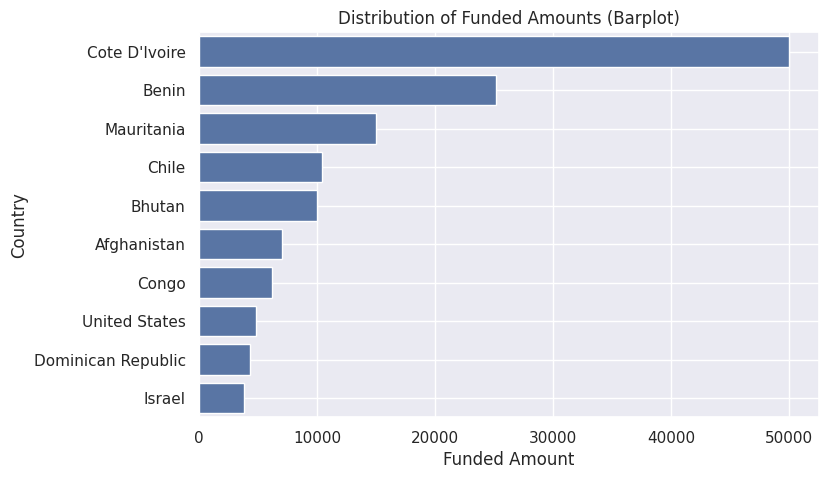

In [90]:
# Histogram
plt.figure(figsize=(8, 5))
sns.barplot(x="funded_amount", 
        y='country',
        data=top_funded_countries)

plt.xlabel("Funded Amount")
plt.ylabel("Country")
plt.title("Distribution of Funded Amounts (Barplot)")
plt.grid(True)
plt.show()

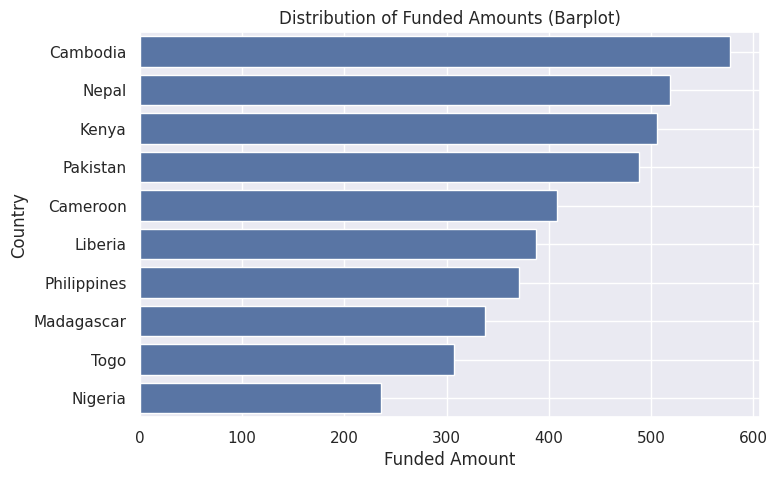

In [91]:
# Histogram
plt.figure(figsize=(8, 5))
sns.barplot(x="funded_amount", 
        y='country',
        data=bottom_funded_countries)

plt.xlabel("Funded Amount")
plt.ylabel("Country")
plt.title("Distribution of Funded Amounts (Barplot)")
plt.grid(True)
plt.show()

##### By: **Sector**

In [92]:
df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'term_in_months', 'lender_count', 'tags', 'repayment_interval', 'date',
       'clean_gender', 'posted_time_year', 'posted_time_month',
       'posted_time_day', 'posted_time_hour', 'posted_time_minute',
       'posted_time_second', 'disbursed_time_year', 'disbursed_time_month',
       'disbursed_time_day', 'disbursed_time_hour', 'disbursed_time_minute',
       'disbursed_time_second', 'funded_time_year', 'funded_time_month',
       'funded_time_day', 'funded_time_hour', 'funded_time_minute',
       'funded_time_second', 'repayment_rate'],
      dtype='object')

In [93]:
# Group the data and calculate the average funded amount by country segment
grouped_funded_amount_sector = df.groupby("sector")["funded_amount"].mean().sort_values(ascending=False)

top_funded_sector = pd.DataFrame(grouped_funded_amount_sector)
top_funded_sector = top_funded_sector.reset_index()
# Print average funded amount by country
print("\nAverage Loan Amount Funded by Sector:")
top_funded_sector


Average Loan Amount Funded by Sector:


,sector,funded_amount
0,Wholesale,1572.004357
1,Clothing,1149.205295
2,Construction,1109.745976
3,Entertainment,1105.042918
4,Arts,1086.454108
5,Health,1058.540253
6,Education,1021.220365
7,Manufacturing,1009.940945
8,Services,940.592379
9,Food,888.387221


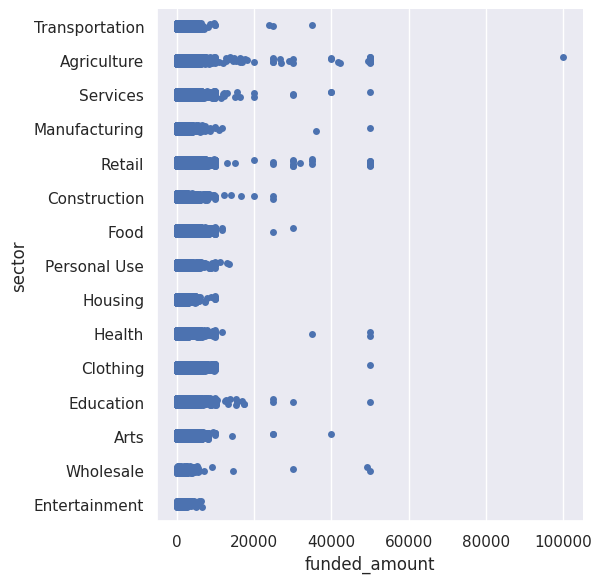

In [94]:
#Loan funded amount by sector

sns.catplot(data=df,y='sector',x='funded_amount', height=6,aspect=1)
#need to rank by maximum count

<Axes: xlabel='sector'>

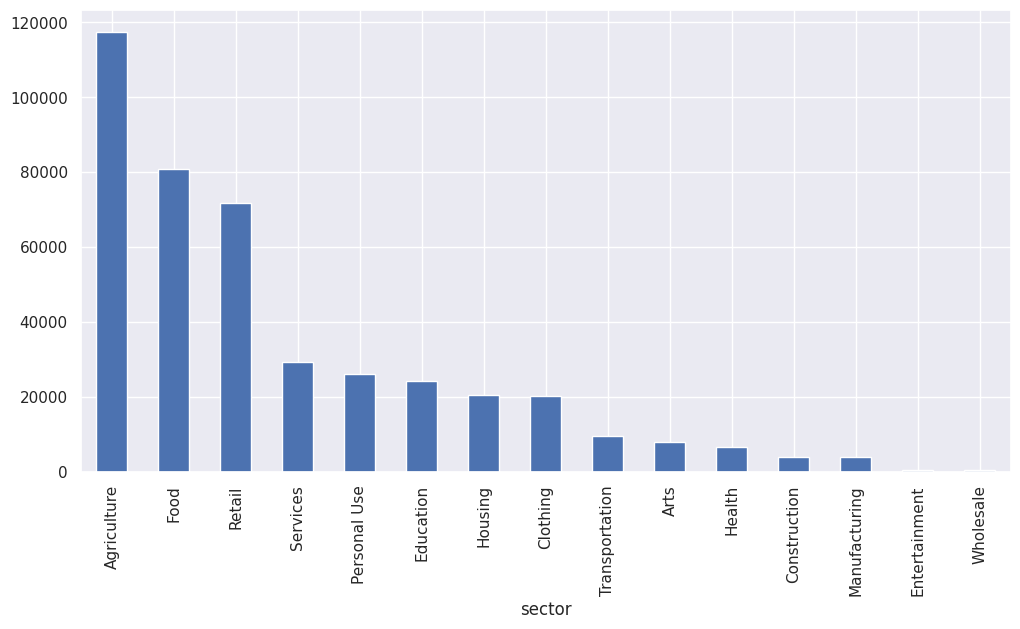

In [95]:
df.groupby('sector')['id'].nunique().sort_values(ascending=False).plot(kind='bar',figsize = [12,6])

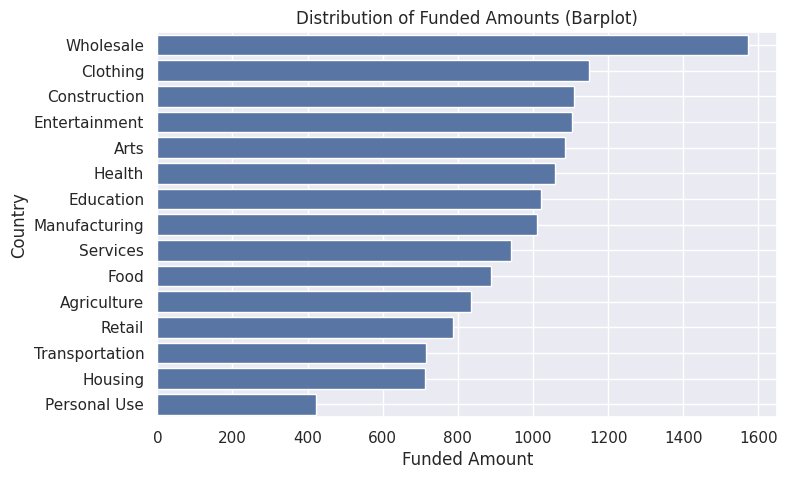

In [96]:
# Histogram
plt.figure(figsize=(8, 5))
sns.barplot(x="funded_amount", 
        y='sector',
        data=top_funded_sector)

plt.xlabel("Funded Amount")
plt.ylabel("Country")
plt.title("Distribution of Funded Amounts (Barplot)")
plt.grid(True)
plt.show()

In [97]:
df.groupby('sector')['lender_count'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize = [12,6])

<Axes: xlabel='sector,lender_count'>

##### By: **Lender Count**

In [55]:
# Group the data and calculate the average funded amount by country segment
grouped_funded_amount_lender_count = df.groupby(["lender_count"])["funded_amount"].mean().sort_values(ascending=False)

# Print average funded amount by Lender count
print("\nAverage Loan Amount Funded by Country and Lender Count:")
print(grouped_funded_amount_lender_count[:15])


Average Loan Amount Funded by Country and Lender Count:
lender_count
2986    100000.0
1550     50000.0
1094     50000.0
782      50000.0
586      50000.0
720      50000.0
1170     50000.0
1302     50000.0
1343     50000.0
1349     50000.0
1402     50000.0
1410     50000.0
1446     50000.0
1481     50000.0
1491     50000.0
Name: funded_amount, dtype: float64


In [56]:
print(grouped_funded_amount_lender_count[-10:])

lender_count
2     392.385362
10    384.947476
1     353.812256
9     346.784820
8     313.801752
3     298.761003
7     297.072995
6     283.678571
5     261.551453
4     238.968967
Name: funded_amount, dtype: float64


##### By: **Lender Count and Country**

In [57]:
# Group the data and calculate the average funded amount by country segment
grouped_funded_amount_lender_count = df.groupby(["country"])["lender_count"].mean().sort_values(ascending=False)

bottom_funded_lender_count = pd.DataFrame(grouped_funded_amount_lender_count[-10:])
bottom_funded_lender_count = bottom_funded_lender_count.reset_index()

# Print average funded amount by Lender count
print("\nAverage Loan Amount Funded by Lender Count:")
bottom_funded_lender_count


Average Loan Amount Funded by Lender Count:


,country,lender_count
0,Nepal,18.184343
1,Cambodia,17.537984
2,Kenya,15.325765
3,Pakistan,14.924182
4,Cameroon,14.136130
5,Liberia,13.108181
6,Madagascar,11.845172
7,Philippines,10.151111
8,Togo,10.069743
9,Nigeria,7.769088


In [58]:
print(grouped_funded_amount_lender_count[-15:])

country
Egypt          22.277505
India          20.841052
El Salvador    20.700720
Mozambique     19.532625
Colombia       18.906014
Nepal          18.184343
Cambodia       17.537984
Kenya          15.325765
Pakistan       14.924182
Cameroon       14.136130
Liberia        13.108181
Madagascar     11.845172
Philippines    10.151111
Togo           10.069743
Nigeria         7.769088
Name: lender_count, dtype: float64
